**Name**- Prashant Singh

**Enrollment Number**- SAU/CS/MTech(CS)/2024/04

**Assignment -4**

**Questions**-

**1.** Implement K-Nearest Neighbors (KNN) using the Iris dataset:
Develop a simple KNN model using the Iris dataset for classification. The model should be built from scratch.

**2.** Implement K-Means Clustering using the Iris dataset:
Drop the target column from the dataset and use the Seaborn pair plot to visually select the two best features in terms of class separation. Based on this, implement K-Means clustering and plot the resulting clusters.

The model should be built from scratch

**3.** Classification using three datasets:

Select any three datasets and apply the available classification algorithms from the following repository:
https://github.com/ShuvoSahaRoy/Data-Analysis-Machine-Learning-Deep-Learning-Journey/tree/master/machine%20learning/Part%203%20-%20Classification?authuser=1

Compare the performance of the algorithms on each dataset to determine the best-performing algorithm for each.

While the sklearn library may be used for model implementation, performance metrics (accuracy, precision, recall, and F1-score) must be computed using numpy only. Please create individual functions to calculate each metric and call them as needed.

**Importing required library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Question-1**

**Solution**

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

Splitting the data in training and testing subsets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Function for KNN**

* This function will take training data, labels, test instance and k(hyper parameter) and will return class labels.

* The function checks the counts of the top two classes:
If there's a clear majority (the most common label occurs more than the second), it returns that label.
If there's a tie (the top two classes have the same count), it defaults to returning the first class in the sorted order (which may not be the best tie-breaking strategy).
If there’s only one class in the top
k, it simply returns that class label


In [5]:
def KNN(train_data, train_labels, test_instance, k):
    dist_ind = np.sqrt(np.sum((train_data - test_instance) ** 2, axis=1))
    main_arr = np.column_stack((train_labels, dist_ind))
    main = main_arr[main_arr[:, 1].argsort()]
    count = Counter(main[:k, 0])
    keys, vals = list(count.keys()), list(count.values())

    if len(vals) > 1:
        if vals[0] > vals[1]:
            return int(keys[0])
        else:
            return int(keys[1])
    else:
        return int(keys[0])


In [6]:
predictions = []
k = 3 #This is hyper-parameter and can be changed

#calling KNN function and appending the returned value in list name predictions
for test_instance in X_test:
    prediction = KNN(X_train, y_train, test_instance, k)
    predictions.append(prediction)


accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


**Visualization Of Output**

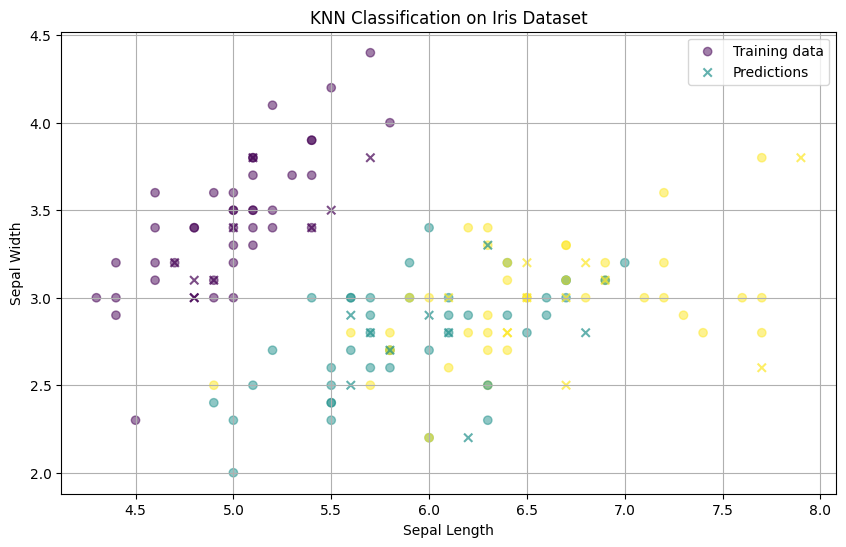

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training data', alpha=0.5)

plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x', label='Predictions', alpha=0.7)

plt.title('KNN Classification on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

**Question-2**

**Solution**

Visualising features of Iris dataset pair wise using seaborn library.

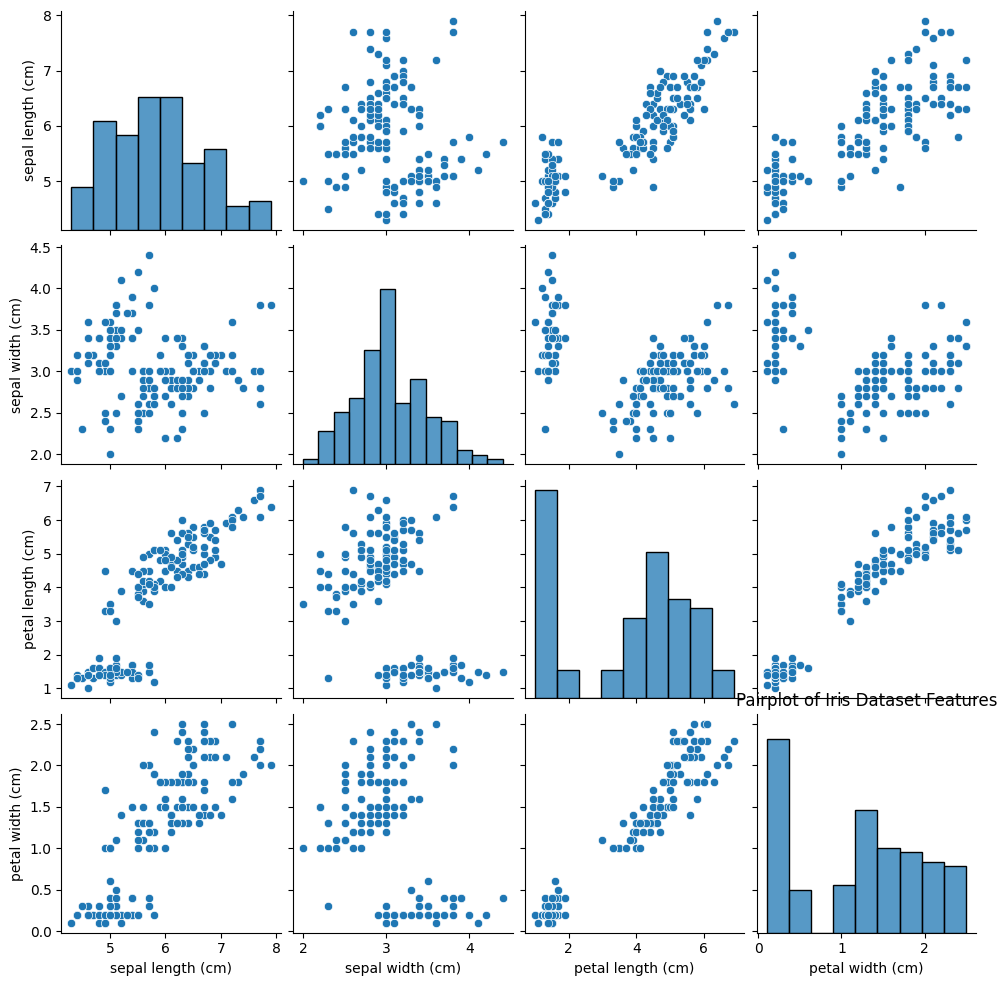

In [8]:
df = pd.DataFrame(X, columns=iris.feature_names)
sns.pairplot(df)
plt.title("Pairplot of Iris Dataset Features")
plt.show()


**K-Means**

Below Functions are performing following tasks:

* Initialize centroids: Randomly select
K points from data.
* Calculate distance: Compute Euclidean distance between points.
* Assign clusters: Find the nearest centroid for each data point.
* Update centroids: Calculate new centroids as the mean of assigned points.
* Run K-Means: Iteratively assign clusters and update centroids until convergence or max iterations.

Output: Final cluster assignments for each data point.




In [12]:
def initialize_random_centroids(K, X):
    m, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        centroids[i] = X[np.random.choice(range(m))]
    return centroids

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

def closest_centroid(x, centroids, K):
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances)

def create_clusters(centroids, K, X):
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx

def compute_means(cluster_idx, K, X):
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        points = X[cluster_idx == i]
        centroids[i] = np.mean(points, axis=0) if len(points) > 0 else centroids[i]
    return centroids

def run_Kmeans(K, X, max_iterations=500):
    centroids = initialize_random_centroids(K, X)
    print(f"Initial centroids: {centroids}")
    for iteration in range(max_iterations):
        clusters = create_clusters(centroids, K, X)
        cluster_output = {i: [] for i in range(K)}
        for idx, cluster in enumerate(clusters):
            cluster_output[int(cluster)].append(X[idx])
        print(f"Iteration {iteration + 1}: Clusters created:")
        for cluster_id, points in cluster_output.items():
            print(f"  Cluster {cluster_id}: {points}")

        previous_centroids = centroids
        centroids = compute_means(clusters, K, X)
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters
    return clusters



Selecting two features i.e. Sepal width and petal width for performing k-means clustering.

In [13]:
X_selected = df[['sepal width (cm)', 'petal width (cm)']].values

K = 3 #Hyper-parameter

#calling k_means function
clusters = run_Kmeans(K, X_selected)

Initial centroids: [[2.8 2.1]
 [3.5 0.2]
 [2.8 1.8]]
Iteration 1: Clusters created:
  Cluster 0: [array([3.3, 2.5]), array([3. , 2.1]), array([3. , 2.2]), array([3. , 2.1]), array([3.6, 2.5]), array([3.2, 2. ]), array([3. , 2.1]), array([2.5, 2. ]), array([2.8, 2.4]), array([3.2, 2.3]), array([3.8, 2.2]), array([2.6, 2.3]), array([3.2, 2.3]), array([2.8, 2. ]), array([2.8, 2. ]), array([3.3, 2.1]), array([2.8, 2.1]), array([3.8, 2. ]), array([2.8, 2.2]), array([3. , 2.3]), array([3.4, 2.4]), array([3.1, 2.1]), array([3.1, 2.4]), array([3.1, 2.3]), array([3.2, 2.3]), array([3.3, 2.5]), array([3. , 2.3]), array([3., 2.]), array([3.4, 2.3])]
  Cluster 1: [array([3.5, 0.2]), array([3. , 0.2]), array([3.2, 0.2]), array([3.1, 0.2]), array([3.6, 0.2]), array([3.9, 0.4]), array([3.4, 0.3]), array([3.4, 0.2]), array([2.9, 0.2]), array([3.1, 0.1]), array([3.7, 0.2]), array([3.4, 0.2]), array([3. , 0.1]), array([3. , 0.1]), array([4. , 0.2]), array([4.4, 0.4]), array([3.9, 0.4]), array([3.5, 0.3]

**Visualization of Output**

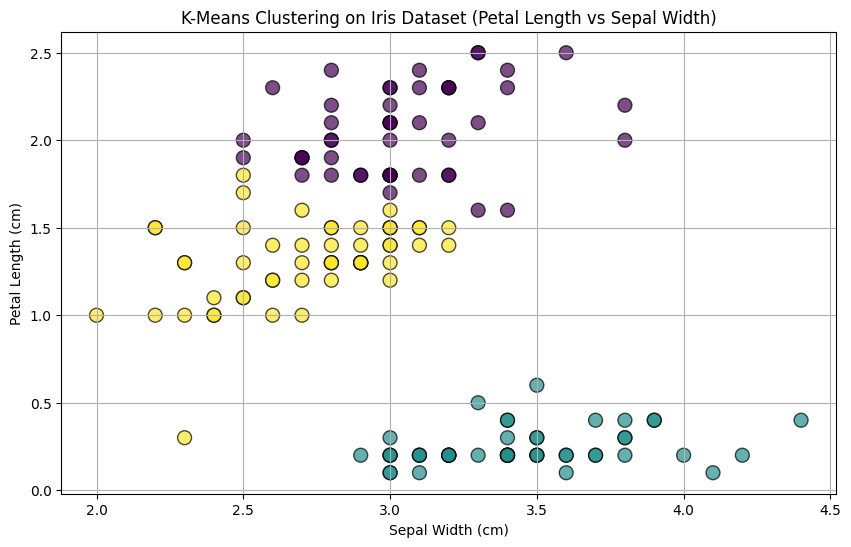

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.title("K-Means Clustering on Iris Dataset (Petal Length vs Sepal Width)")
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

**Question-3**

**Solution**

**Function for Computing Accuracy**

This function calculates the ratio of correct predictions made by the classifier to the total predictions.

In [15]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

**Function for Computing Precision**

This function computes the ratio of true positive predictions to the total predicted positives, indicating the classifier's accuracy in identifying relevant instances.

In [16]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0


**Function for Computing Recall**

This function evaluates the proportion of true positive predictions to the actual positive instances, measuring the classifier's ability to capture all relevant cases.

In [17]:
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

**Function for Computing f1_score**

This function combines precision and recall into a single metric, providing a balanced measure of the classifier's performance on positive predictions.





In [18]:
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0

**Function for Evulating Classifier**

* This function will take classifier used, train, test data as input and will call various evulation functions and return their values.

In [19]:
def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return {
        "accuracy": accuracy(y_test, y_pred),
        "precision": precision(y_test, y_pred),
        "recall": recall(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
    }

**Importing various classifiers using sklearn library**

In [24]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "SVM": SVC(),
    "Kernel SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500),
}

**Dataset-1**  
**Sonar Dataset**-
 This dataset consists of 208 samples, each representing a sonar signal reflected off a cylindrical object. It includes 60 features, which are numeric values representing the intensity of echoes at various angles. The dataset is used for binary classification tasks, distinguishing between rocks and metal cylinders. Each sample is labeled as either "rock" or "mine," making it a common dataset for testing machine learning algorithms, particularly in classification scenarios.



In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

X = sonar_data.iloc[:, :-1].values
y = sonar_data.iloc[:, -1].map({'R': 0, 'M': 1}).values

best_clf_name = None
best_accuracy = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Performance metrics for Sonar Dataset:")
for clf_name, clf in classifiers.items():
    metrics = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    print(f"{clf_name}: {metrics}")

    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_clf_name = clf_name

print(f"Best performing classifier: {best_clf_name} with accuracy: {best_accuracy}")

Performance metrics for Sonar Dataset:
SVM: {'accuracy': 0.8333333333333334, 'precision': 0.9130434782608695, 'recall': 0.8076923076923077, 'f1_score': 0.8571428571428572}
Kernel SVM: {'accuracy': 0.8333333333333334, 'precision': 0.9130434782608695, 'recall': 0.8076923076923077, 'f1_score': 0.8571428571428572}
Naive Bayes: {'accuracy': 0.7380952380952381, 'precision': 0.9411764705882353, 'recall': 0.6153846153846154, 'f1_score': 0.744186046511628}
Decision Tree: {'accuracy': 0.6666666666666666, 'precision': 0.7727272727272727, 'recall': 0.6538461538461539, 'f1_score': 0.7083333333333333}
Random Forest: {'accuracy': 0.8095238095238095, 'precision': 0.9090909090909091, 'recall': 0.7692307692307693, 'f1_score': 0.8333333333333333}
Logistic Regression: {'accuracy': 0.7857142857142857, 'precision': 0.9047619047619048, 'recall': 0.7307692307692307, 'f1_score': 0.8085106382978723}
Best performing classifier: SVM with accuracy: 0.8333333333333334


**Dataset-2**

**Diabetes Dataset**- This Dataset consists of 768 samples, each containing 8 numeric features related to health measurements, such as glucose level, blood pressure, and body mass index (BMI). The goal is to predict the onset of diabetes within five years, based on these features. The dataset is used for binary classification, with each sample labeled as either "diabetic" or "non-diabetic." It is commonly used for evaluating machine learning algorithms and exploring relationships between health metrics and diabetes risk.

In [36]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = (diabetes.target > 140).astype(int)

best_clf_name = None
best_accuracy = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Performance metrics for Diabetes Dataset:")
for clf_name, clf in classifiers.items():
    metrics = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    print(f"{clf_name}: {metrics}")

    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_clf_name = clf_name

print(f"Best performing classifier: {best_clf_name} with accuracy: {best_accuracy}")

Performance metrics for Diabetes Dataset:
SVM: {'accuracy': 0.7528089887640449, 'precision': 0.7045454545454546, 'recall': 0.775, 'f1_score': 0.7380952380952381}
Kernel SVM: {'accuracy': 0.7528089887640449, 'precision': 0.7045454545454546, 'recall': 0.775, 'f1_score': 0.7380952380952381}
Naive Bayes: {'accuracy': 0.7191011235955056, 'precision': 0.6923076923076923, 'recall': 0.675, 'f1_score': 0.6835443037974683}
Decision Tree: {'accuracy': 0.7191011235955056, 'precision': 0.7027027027027027, 'recall': 0.65, 'f1_score': 0.6753246753246753}
Random Forest: {'accuracy': 0.7191011235955056, 'precision': 0.6744186046511628, 'recall': 0.725, 'f1_score': 0.6987951807228916}
Logistic Regression: {'accuracy': 0.7415730337078652, 'precision': 0.7073170731707317, 'recall': 0.725, 'f1_score': 0.7160493827160495}
Best performing classifier: SVM with accuracy: 0.7528089887640449


**Dataset-3**

**Wine Dataset** -This dataset comprises 178 samples, each representing different chemical properties of wine derived from three different cultivars of grape. It includes 13 features, such as alcohol content, malic acid, and color intensity, which are used to classify the wines into one of three categories. The dataset is commonly used for classification tasks in machine learning and provides insights into the chemical characteristics that distinguish different types of wine.

In [37]:
from sklearn.preprocessing import StandardScaler
wine = datasets.load_wine()

best_clf_name = None
best_accuracy = 0

X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Performance metrics for Wine Dataset:")
for clf_name, clf in classifiers.items():
    metrics = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    print(f"{clf_name}: {metrics}")

    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_clf_name = clf_name

print(f"Best performing classifier: {best_clf_name} with accuracy: {best_accuracy}")

Performance metrics for Wine Dataset:
SVM: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Kernel SVM: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Naive Bayes: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Decision Tree: {'accuracy': 0.9444444444444444, 'precision': 0.9333333333333333, 'recall': 1.0, 'f1_score': 0.9655172413793104}
Random Forest: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Logistic Regression: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Best performing classifier: SVM with accuracy: 1.0


For all 3 datasets taken SVM performs the best.